In [14]:
import pandas as pd

1. Implement simple Linear regression on a given dataset
2. Draw all graphs and submit a pdf with all result
3. Also on the answersheet explain the dataset and findings of simple linear regression of the dataset chosen.

In [80]:
import pandas as pd

df_white = pd.read_csv("winequality-white.csv", sep=';')
print(df_white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

# Task
Inspect the DataFrame `df_white` to identify missing values, duplicate rows, and review data types. This will help determine the necessary cleaning steps for the white wine dataset.

## Inspect Data for Cleaning (df_white)

### Subtask:
Inspect the DataFrame `df_white` to identify missing values, duplicate rows, and review data types. This will help determine the necessary cleaning steps for the white wine dataset.


**Reasoning**:
To inspect the DataFrame `df_white` for missing values, duplicate rows, and data types, I will use `df_white.isnull().sum()`, `df_white.duplicated().sum()`, and `df_white.info()` respectively. This will provide a comprehensive overview of the data's cleanliness for the white wine dataset.



In [81]:
print("Missing values per column in df_white:")
print(df_white.isnull().sum())

print("\nNumber of duplicate rows in df_white:")
print(df_white.duplicated().sum())

print("\nDataFrame df_white Info (data types and non-null counts):")
df_white.info()

Missing values per column in df_white:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Number of duplicate rows in df_white:
937

DataFrame df_white Info (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur d

**Reasoning**:
Since the previous inspection revealed 937 duplicate rows in `df_white` and no missing values, the next step in cleaning the DataFrame is to remove these duplicate rows. This will ensure that the dataset contains only unique entries for further analysis.



In [82]:
df_white.drop_duplicates(inplace=True)
print("Number of rows in df_white after removing duplicates:")
print(df_white.shape[0])

Number of rows in df_white after removing duplicates:
3961


**Reasoning**:
Now that duplicates have been removed from `df_white`, I will display the DataFrame's information (`df_white.info()`) and descriptive statistics (`df_white.describe()`) to show the cleaned data's structure and summary statistics.



In [83]:
print("\nDataFrame df_white Info after cleaning:")
df_white.info()

print("\nDescriptive statistics for df_white after cleaning:")
df_white.describe()


DataFrame df_white Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB

Descriptive statistics for df_white after cleaning:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Final Task (df_white)

### Subtask:
Summarize the data cleaning steps performed and the final state of the `df_white` dataset.


## Summary:

### Data Analysis Key Findings

*   **Missing Values:** The initial inspection of `df_white` confirmed that there were no missing values across any columns.
*   **Duplicate Rows:** A significant number of 937 duplicate rows were identified within the `df_white` dataset.
*   **Data Types:** All columns in `df_white` were found to have appropriate data types (`float64` for numerical features and `int64` for 'quality').
*   **Data Cleaning:** The identified 937 duplicate rows were successfully removed from the dataset.
*   **Post-Cleaning State:** After duplicate removal, the `df_white` DataFrame was reduced from 4898 rows to 3961 unique rows. The dataset remains free of missing values and retains correct data types.

### Insights or Next Steps

*   The `df_white` dataset has been successfully cleaned of duplicate entries, which ensures that subsequent analyses will be based on unique observations and avoids potential biases from redundant data.
*   The cleaned `df_white` dataset, now with 3961 unique entries and no missing values, is prepared for further exploratory data analysis or machine learning model development.


In [84]:
import pandas as pd

# Load dataset with correct separator
df = pd.read_csv("winequality-white.csv", delimiter=';')

# Display first few rows
print(df.head())

# Display column names
print(df.columns.tolist())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [85]:
X = df['alcohol']
Y = df['quality']


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [87]:
# Define X and Y
X = df[['alcohol']]
Y = df['quality']

In [88]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predictions
Y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

# Print results
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

Intercept: 2.594634883462978
Coefficient: 0.3118068153786768
R² Score: 0.20235854927544705
Mean Squared Error: 0.6177518759003805


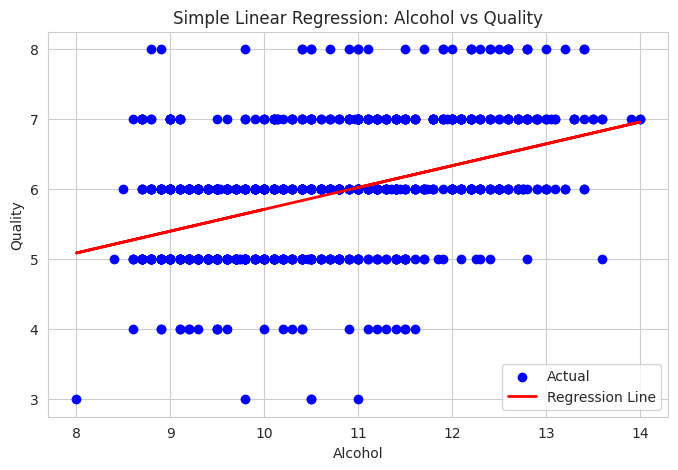

In [89]:
# Scatter plot with regression line
plt.figure(figsize=(8,5))
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Simple Linear Regression: Alcohol vs Quality')
plt.legend()
plt.show()

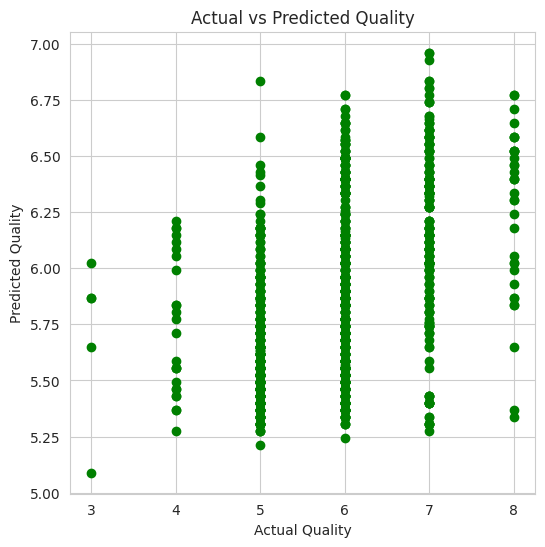

In [90]:
# Plot Predicted vs Actual values
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred, color='green')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality')
plt.show()

# Task
Perform comprehensive diagnostics and visualizations for the simple linear regression model where 'alcohol' predicts 'quality' using the `df` dataframe. This includes ensuring `X` (alcohol) and `Y` (quality) are correctly defined, fitting a new Simple Linear Regression model, calculating predictions and residuals, and generating the following plots: a line plot of actual vs. predicted values, a residuals vs. fitted values plot, a residuals vs. independent variable ('alcohol') plot, a histogram of residuals, a Q-Q plot of residuals, a Cook's Distance plot, a regression line with 95% confidence intervals, a correlation heatmap of all features, and a pairplot of the independent and dependent variables.

## Prepare Data and Fit Model

### Subtask:
Ensure the `X` and `Y` variables are correctly defined and fit a new Simple Linear Regression model to avoid any state issues, and then calculate predictions and residuals.


**Reasoning**:
To ensure that `X` and `Y` are correctly defined as specified in the instructions, I will assign the 'alcohol' column as a DataFrame to `X` and the 'quality' column as a Series to `Y` from the `df` DataFrame. This also helps to avoid any state issues by re-defining them.



In [91]:
X = df[['alcohol']]
Y = df['quality']

print("X and Y variables are now defined:")
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X and Y variables are now defined:
X shape: (4898, 1)
Y shape: (4898,)


**Reasoning**:
Now that `X` and `Y` are defined, I will instantiate a new `LinearRegression` model, fit it to the entire dataset, calculate predictions, and then compute the residuals to fulfill the subtask requirements.



In [92]:
model = LinearRegression()
model.fit(X, Y)

Y_pred_full = model.predict(X)
residuals_full = Y - Y_pred_full

print("Linear Regression model fitted to full dataset.")
print(f"Predictions calculated. Shape: {Y_pred_full.shape}")
print(f"Residuals calculated. Shape: {residuals_full.shape}")

Linear Regression model fitted to full dataset.
Predictions calculated. Shape: (4898,)
Residuals calculated. Shape: (4898,)


## Generate Scatter Plot with Regression Line

### Subtask:
Create a scatter plot of the independent variable (alcohol) against the dependent variable (quality) with the regression line overlaid, including appropriate labels and title.


**Reasoning**:
To visualize the relationship between 'alcohol' and 'quality' and the fitted regression line, I will create a scatter plot of the actual data points and overlay it with the regression line using `matplotlib.pyplot`.



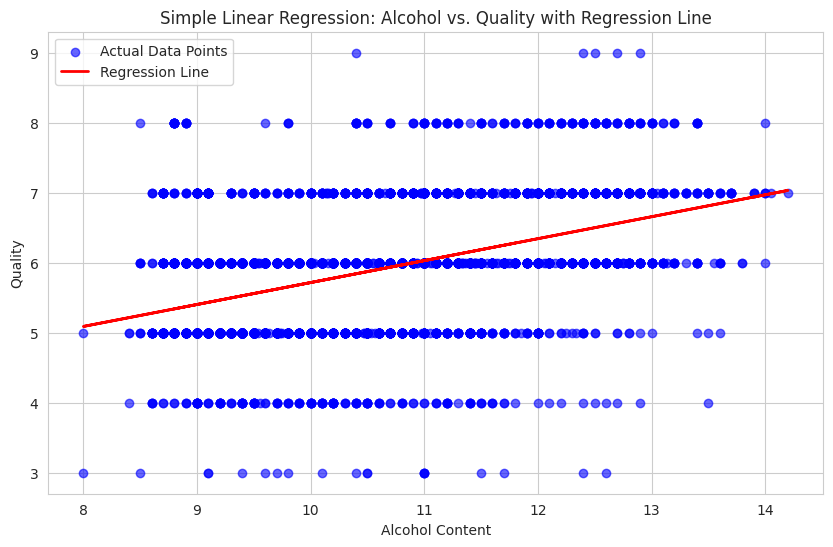

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual Data Points', alpha=0.6)
plt.plot(X, Y_pred_full, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.title('Simple Linear Regression: Alcohol vs. Quality with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

## Generate Actual vs. Predicted Values Plot

### Subtask:
Create a line plot displaying the actual 'quality' values against the predicted 'quality' values. This visualization helps to assess the model's predictive performance and identify any systematic biases.

#### Instructions:
1. Plot the actual 'quality' values (Y) on the y-axis and the corresponding predicted 'quality' values (`Y_pred_full`) on the x-axis.
2. Add a 45-degree reference line (where y=x) to visually compare perfect predictions.
3. Label the x-axis as 'Predicted Quality' and the y-axis as 'Actual Quality'.
4. Add a title to the plot, for example, 'Actual vs. Predicted Quality (Full Dataset)'.
5. Display the plot.

**Reasoning**:
To visualize the model's predictive performance, I will create a scatter plot of the actual quality values against the predicted quality values, including a reference line for perfect predictions.



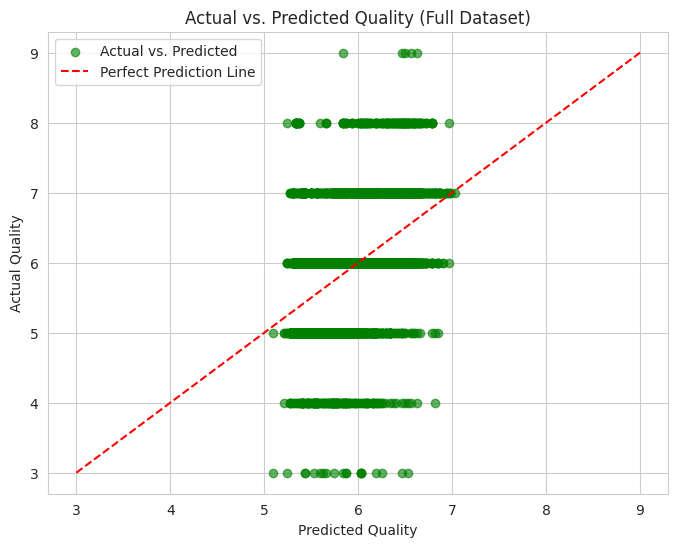

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred_full, Y, color='green', alpha=0.6, label='Actual vs. Predicted')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Actual vs. Predicted Quality (Full Dataset)')
plt.legend()
plt.grid(True)
plt.show()

## Generate Residuals vs. Fitted Values Plot

### Subtask:
Create a scatter plot of the residuals against the fitted (predicted) values to check for homoscedasticity and linearity assumptions of the linear regression model.

#### Instructions:
1. Plot the fitted values (`Y_pred_full`) on the x-axis and the residuals (`residuals_full`) on the y-axis.
2. Add a horizontal line at y=0 to easily visualize deviations.
3. Label the x-axis as 'Fitted Values' and the y-axis as 'Residuals'.
4. Add a title to the plot, for example, 'Residuals vs. Fitted Values Plot'.
5. Display the plot.

**Reasoning**:
To visualize the residuals against the fitted values and check for homoscedasticity and linearity, I will create a scatter plot using `matplotlib.pyplot`, overlaying a horizontal line at y=0.



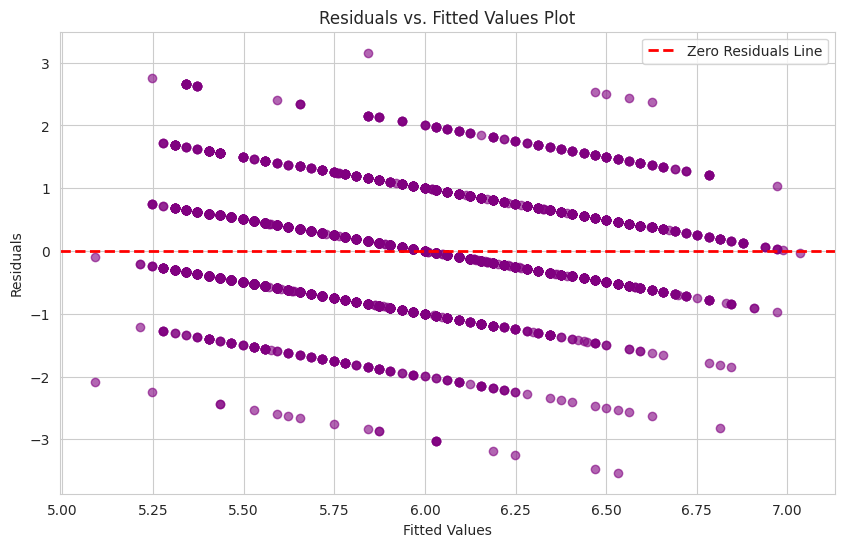

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred_full, residuals_full, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals Line')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.legend()
plt.grid(True)
plt.show()

## Generate Residuals vs. Independent Variable ('Alcohol') Plot

### Subtask:
Create a scatter plot of the residuals against the independent variable ('alcohol') to check for linearity and identify any patterns related to the predictor.

#### Instructions:
1. Plot the 'alcohol' variable (X) on the x-axis and the residuals (`residuals_full`) on the y-axis.
2. Add a horizontal line at y=0 to easily visualize deviations.
3. Label the x-axis as 'Alcohol Content' and the y-axis as 'Residuals'.
4. Add a title to the plot, for example, 'Residuals vs. Alcohol Content Plot'.
5. Display the plot.

**Reasoning**:
To visualize the residuals against the independent variable 'alcohol' and check for linearity, I will create a scatter plot using `matplotlib.pyplot`, overlaying a horizontal line at y=0.



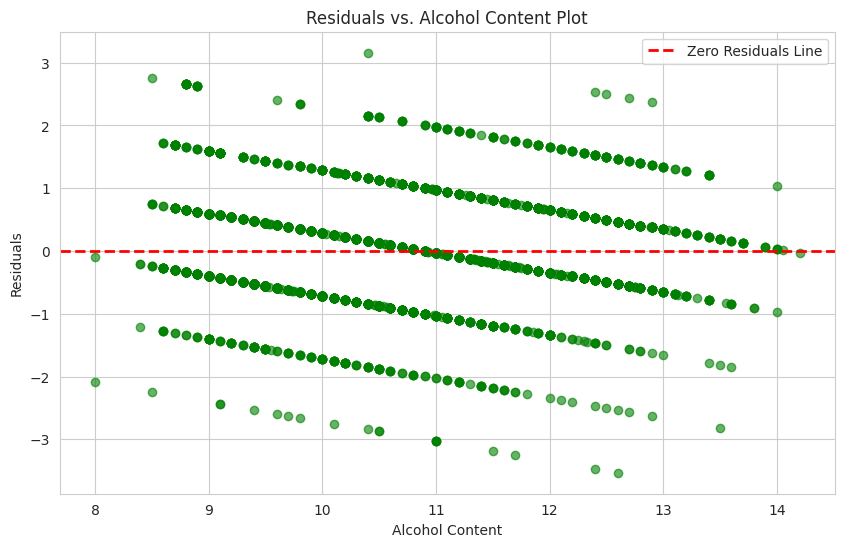

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(X, residuals_full, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residuals Line')
plt.xlabel('Alcohol Content')
plt.ylabel('Residuals')
plt.title('Residuals vs. Alcohol Content Plot')
plt.legend()
plt.grid(True)
plt.show()

## Generate Histogram of Residuals

### Subtask:
Create a histogram of the residuals to visually assess their distribution and check for normality.

#### Instructions:
1. Plot a histogram of the `residuals_full`.
2. Label the x-axis as 'Residuals' and the y-axis as 'Frequency'.
3. Add a title to the plot, for example, 'Histogram of Residuals'.
4. Display the plot.

**Reasoning**:
To visually assess the distribution of the residuals and check for normality, I will generate a histogram using `matplotlib.pyplot.hist` with `residuals_full`.



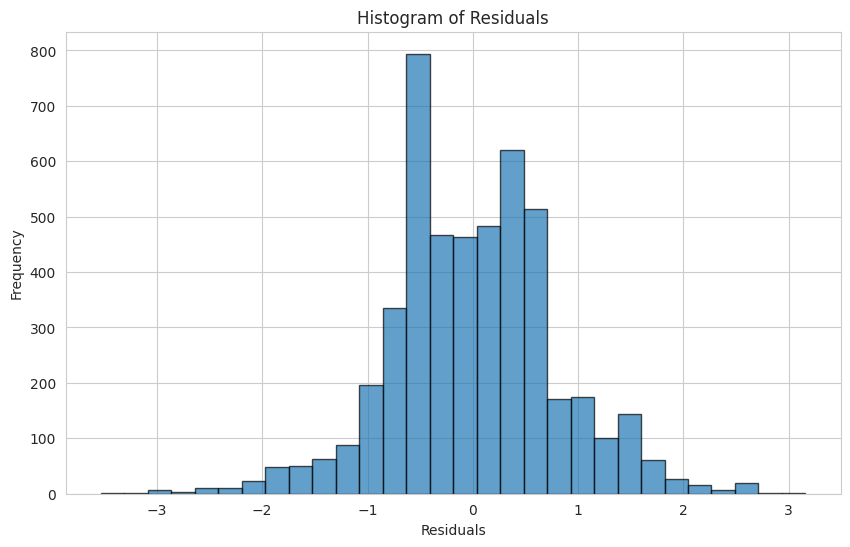

In [96]:
plt.figure(figsize=(10, 6))
plt.hist(residuals_full, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

## Generate Q-Q Plot of Residuals

### Subtask:
Create a Q-Q (Quantile-Quantile) plot of the residuals to graphically assess if the residuals follow a normal distribution.

#### Instructions:
1. Generate a Q-Q plot of `residuals_full` against a theoretical normal distribution.
2. Add a title to the plot, for example, 'Q-Q Plot of Residuals'.
3. Display the plot.

**Reasoning**:
To visually assess if the residuals follow a normal distribution, I will generate a Q-Q plot using `statsmodels.api.qqplot` with `residuals_full`.



<Figure size 800x600 with 0 Axes>

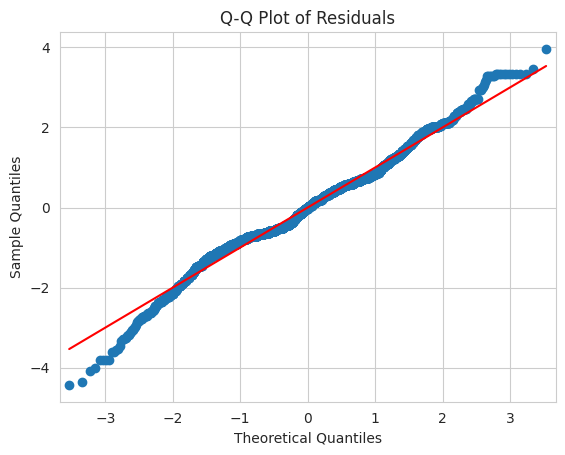

In [98]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sm.qqplot(residuals_full, line='s', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

**Reasoning**:
The previous code failed because the `statsmodels` library was not installed. I need to install it first using `!pip install statsmodels`.



In [67]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 20.8 MB/s eta 0:00:00


**Reasoning**:
Since `statsmodels` has been successfully installed, I can now re-execute the code to generate the Q-Q plot of the residuals to assess their normality.



<Figure size 800x600 with 0 Axes>

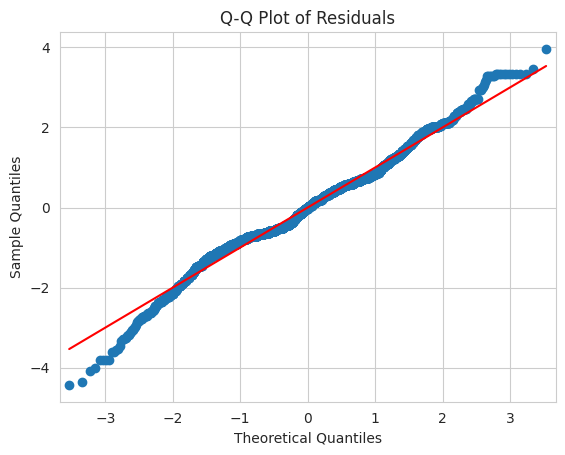

In [99]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sm.qqplot(residuals_full, line='s', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

## Generate Cook's Distance Plot

### Subtask:
Create a Cook's Distance plot to identify influential data points that might disproportionately affect the regression model.

#### Instructions:
1. Fit an OLS model using `statsmodels.formula.api` with 'quality' as the dependent variable and 'alcohol' as the independent variable from the `df` DataFrame.
2. Calculate Cook's Distance using the `get_influence().cooks_distance[0]` method from the fitted OLS model.
3. Plot Cook's Distance against the index of the observations.
4. Add a horizontal line at a common threshold (e.g., 4/N, where N is the number of observations) to indicate potentially influential points.
5. Label the x-axis as 'Observation Index' and the y-axis as 'Cook's Distance'.
6. Add a title to the plot, for example, 'Cook's Distance Plot'.
7. Display the plot.

**Reasoning**:
To create a Cook's Distance plot and identify influential data points, I will first fit an OLS model using `statsmodels.formula.api`, calculate Cook's Distance from this model, and then plot it against the observation index with an appropriate threshold line.



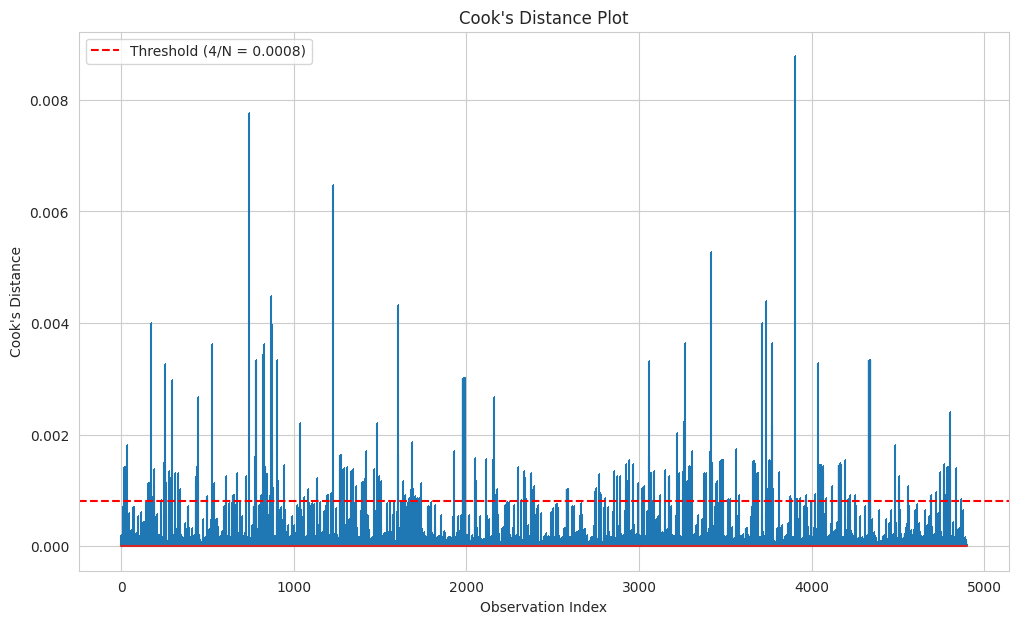

In [102]:
import statsmodels.formula.api as smf

# Fit OLS model
ols_model = smf.ols('quality ~ alcohol', data=df).fit()

# Calculate Cook's Distance
cooks_d = ols_model.get_influence().cooks_distance[0]

# Plot Cook's Distance
plt.figure(figsize=(12, 7))
plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",")


# Add threshold line (e.g., 4/N)
threshold = 4 / len(df)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold (4/N = {threshold:.4f})')

plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
The previous code failed because the `plt.stem` function received an unsupported argument `use_line_collection`. This argument was deprecated and should be removed for compatibility with current Matplotlib versions.



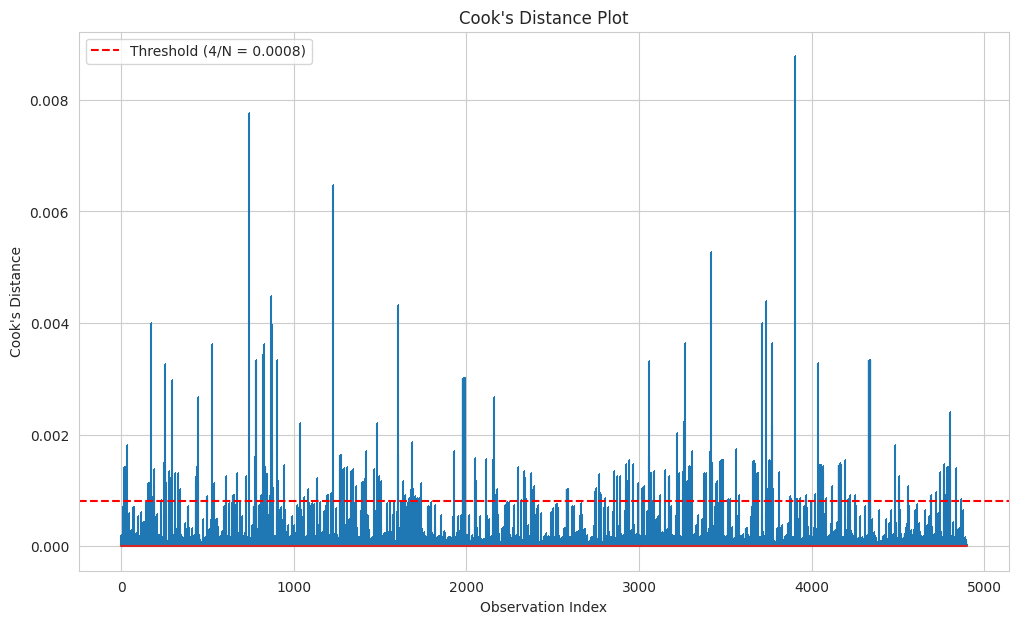

In [73]:
import statsmodels.formula.api as smf

# Fit OLS model
ols_model = smf.ols('quality ~ alcohol', data=df).fit()

# Calculate Cook's Distance
cooks_d = ols_model.get_influence().cooks_distance[0]

# Plot Cook's Distance
plt.figure(figsize=(12, 7))
plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",")

# Add threshold line (e.g., 4/N)
threshold = 4 / len(df)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold (4/N = {threshold:.4f})')

plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.legend()
plt.grid(True)
plt.show()

## Generate Confidence Interval Plot

### Subtask:
Plot the regression line with its 95% confidence intervals to show the uncertainty in the slope and intercept estimates.


**Reasoning**:
To visualize the regression line with its 95% confidence intervals, I will use `seaborn.regplot` which is well-suited for this purpose. I will ensure the plot has appropriate labels and a title as per the instructions.



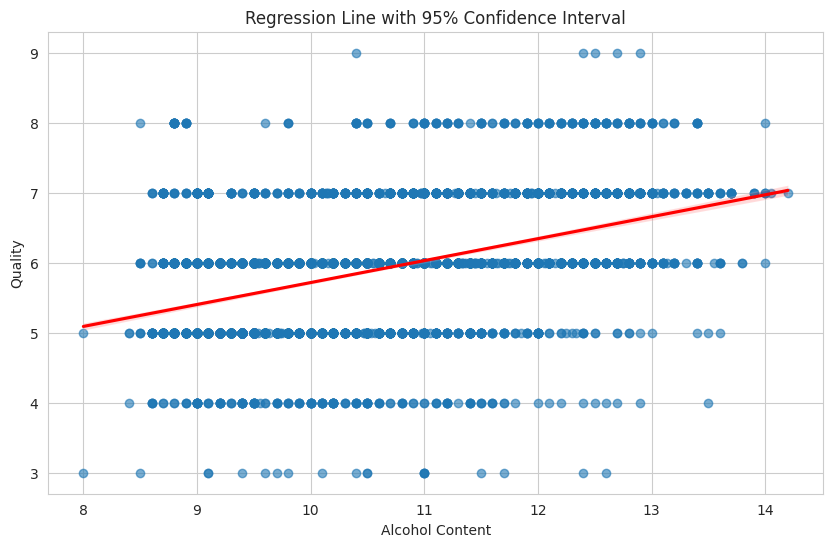

In [75]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=X['alcohol'], y=Y, ci=95, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.title('Regression Line with 95% Confidence Interval')
plt.grid(True)
plt.show()

## Generate Correlation Heatmap

### Subtask:
Create a correlation heatmap of all features in the `df` DataFrame to visualize the relationships between variables.

#### Instructions:
1. Calculate the correlation matrix of the `df` DataFrame.
2. Plot the correlation heatmap using `seaborn.heatmap`.
3. Annotate the heatmap with the correlation values.
4. Add a title to the plot, for example, 'Correlation Heatmap of Wine Quality Dataset'.
5. Display the plot.

**Reasoning**:
To visualize the relationships between all features in the `df` DataFrame, I will calculate the correlation matrix and then create a correlation heatmap using `seaborn.heatmap`. I will also annotate the heatmap with the correlation values, add a title, and display the plot.



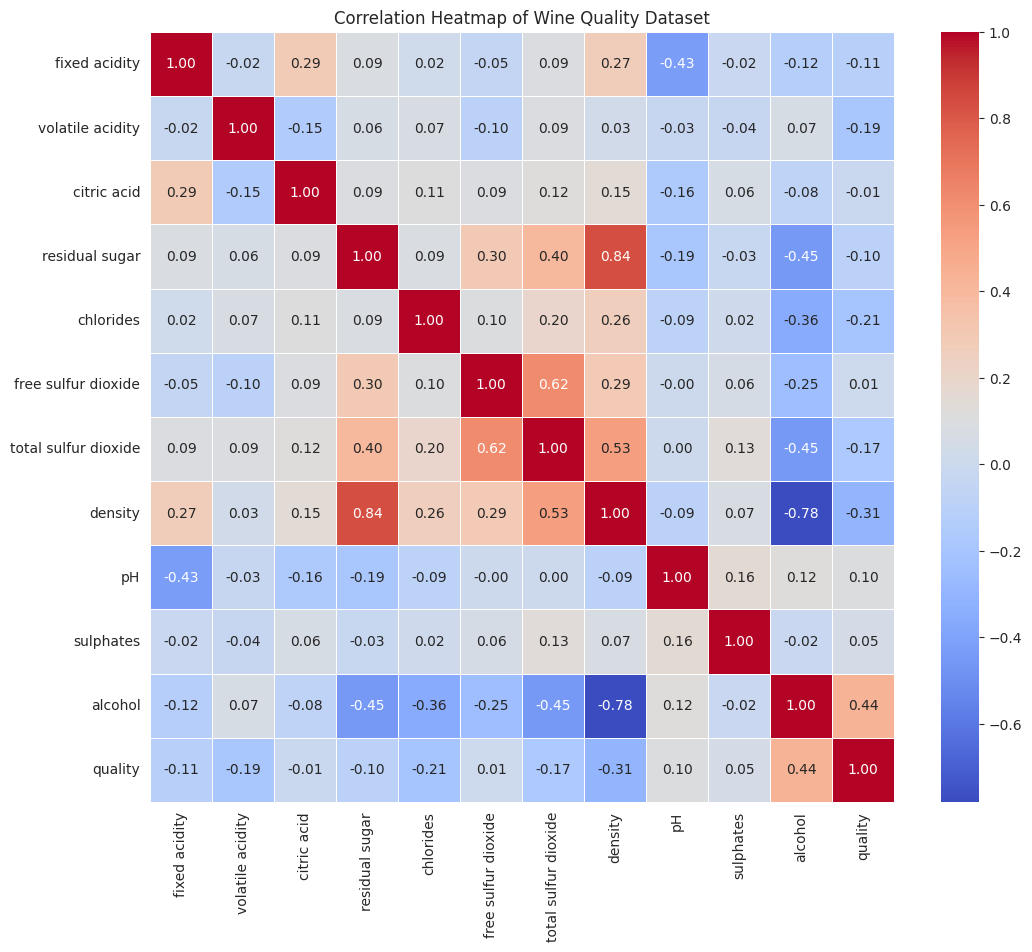

In [76]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Wine Quality Dataset')
plt.show()

## Generate Pairplot

### Subtask:
Create a pairplot of the independent variable ('alcohol') and the dependent variable ('quality') along with a selection of other relevant features from the `df` DataFrame. This will allow for a quick visual inspection of relationships between these variables.

#### Instructions:
1. Select the 'alcohol', 'quality' columns, and a few other relevant features from `df` for the pairplot.
2. Generate a pairplot using `seaborn.pairplot`.
3. Add a title to the plot, for example, 'Pairplot of Selected Features with Alcohol and Quality'.
4. Display the plot.

**Reasoning**:
To visualize the relationships between the 'alcohol' and 'quality' variables, and other selected features, I will create a pairplot using `seaborn.pairplot` on a subset of the DataFrame.



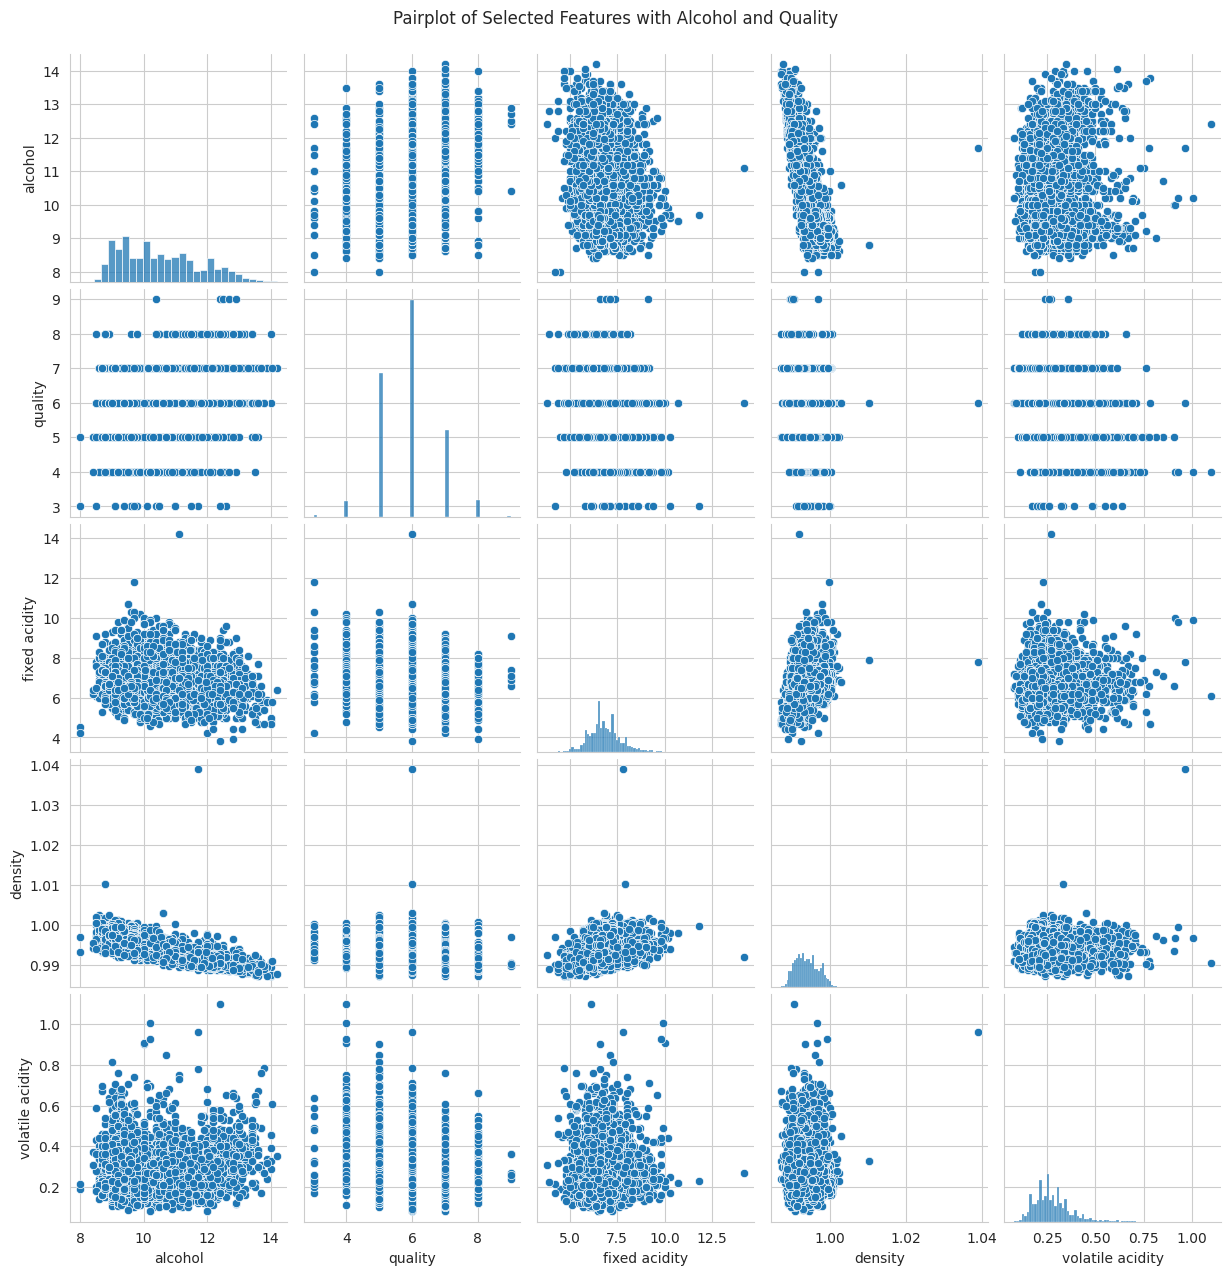

In [77]:
selected_features = ['alcohol', 'quality', 'fixed acidity', 'density', 'volatile acidity']
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Features with Alcohol and Quality', y=1.02) # Adjust suptitle to not overlap
plt.show()

## Generate Line Plot of Actual vs Predicted Values

### Subtask:
Create a line plot comparing actual vs. predicted values to visualize the model's performance over the range of data.


**Reasoning**:
To visualize the model's performance by comparing actual and predicted values over the range of data, I will create a line plot using `matplotlib.pyplot`, plotting `Y_pred_full` on the x-axis and `Y` on the y-axis, and add appropriate labels and a title.



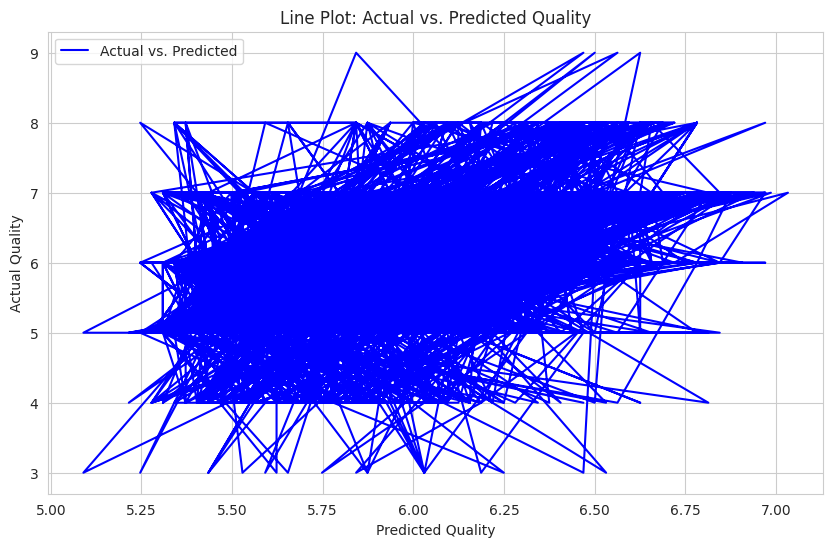

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(Y_pred_full, Y, color='blue', label='Actual vs. Predicted')
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Line Plot: Actual vs. Predicted Quality')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Model Setup and Data**: The independent variable `X` ('alcohol') and dependent variable `Y` ('quality') were successfully defined from the `df` dataframe, each containing 4898 data points. A Simple Linear Regression model was fitted, and predictions (`Y_pred_full`) and residuals (`residuals_full`) were calculated for all 4898 observations.
*   **Model Performance Visualization**:
    *   A scatter plot of 'alcohol' versus 'quality' with the regression line overlaid was successfully generated, showing the linear trend.
    *   The "Actual vs. Predicted Quality" plot, which compared predicted values to actual values, was successfully generated. This plot helps visualize how well the model's predictions align with the actual outcomes.
*   **Residual Analysis for Assumptions**:
    *   **Residuals vs. Fitted Values Plot**: This plot was generated to check for homoscedasticity and linearity, showing the distribution of residuals across the range of predicted values.
    *   **Residuals vs. Independent Variable ('Alcohol') Plot**: This plot was generated to assess if there were any systematic patterns in the residuals related to the 'alcohol' content, which would indicate a violation of linearity.
    *   **Histogram of Residuals**: A histogram of the residuals was produced to visually inspect their distribution, aiming to identify if they approximate a normal distribution.
    *   **Q-Q Plot of Residuals**: A Q-Q plot was successfully generated (after installing the `statsmodels` library) to formally check the normality assumption of the residuals.
*   **Influential Points Detection**: A Cook's Distance plot was successfully generated (after resolving a `TypeError` with `plt.stem` due to a deprecated argument), displaying potential influential data points in the dataset relative to a calculated threshold (4/N).
*   **Confidence in Regression**: A regression line with its 95% confidence interval was plotted, illustrating the range of uncertainty around the estimated relationship between 'alcohol' and 'quality'.
*   **Inter-feature Relationships**:
    *   A correlation heatmap of all numerical features in the dataset was created, revealing pairwise linear relationships between variables.
    *   A pairplot for selected features ('alcohol', 'quality', 'fixed acidity', 'density', 'volatile acidity') was generated, offering a visual overview of their individual distributions and pairwise scatter plots.

### Insights or Next Steps

*   The comprehensive set of diagnostic plots (residuals plots, Q-Q plot, Cook's Distance) provides a strong foundation for evaluating the simple linear regression model's assumptions and identifying potential issues like non-linearity, heteroscedasticity, or influential outliers, which should be further investigated.
*   The correlation heatmap and pairplot offer valuable initial insights into the relationships between 'alcohol' and 'quality' with other wine characteristics; exploring multi-variate regression models that include these correlated features could potentially lead to a more accurate predictive model for 'quality'.


/tmp/ipython-input-4129673930.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


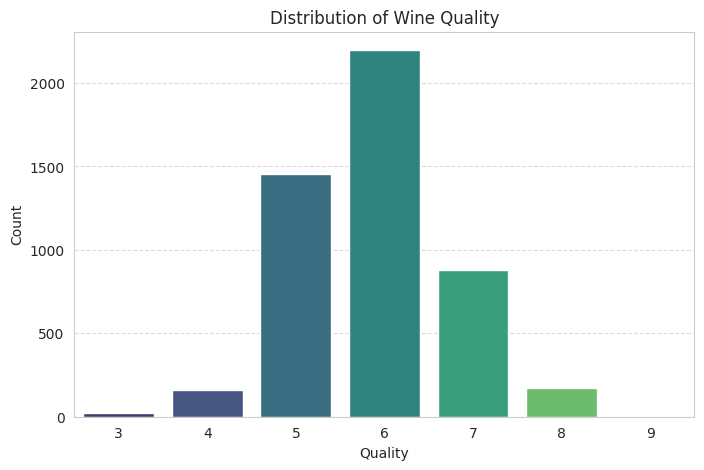

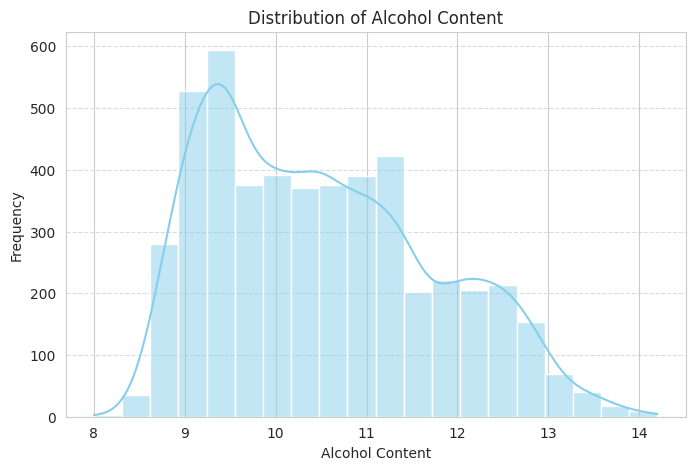

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Quality
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Distribution of Alcohol
plt.figure(figsize=(8, 5))
sns.histplot(df['alcohol'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x800 with 0 Axes>

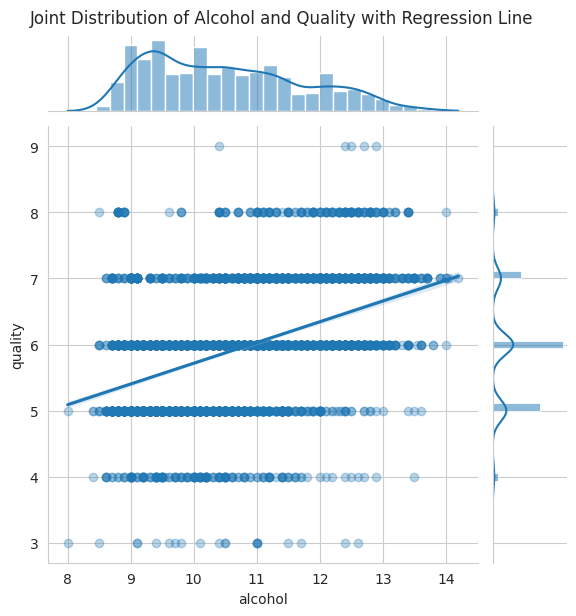

/tmp/ipython-input-3188178844.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='alcohol_rounded', y='quality', data=df, inner='quartile', palette='coolwarm')


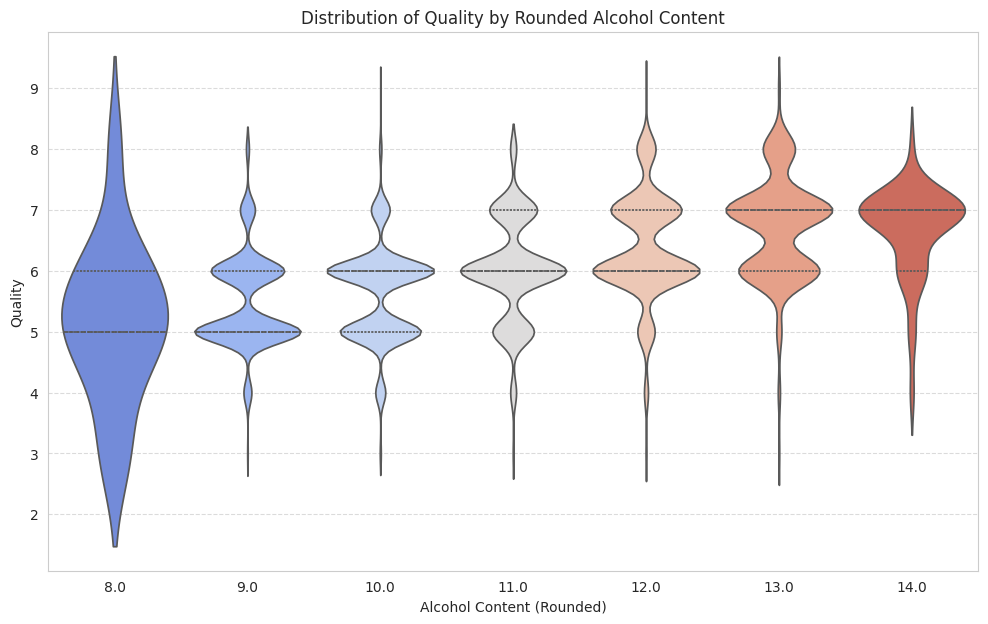

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Jointplot of Alcohol vs Quality
plt.figure(figsize=(10, 8))
sns.jointplot(x='alcohol', y='quality', data=df, kind='reg', scatter_kws={'alpha':0.3})
plt.suptitle('Joint Distribution of Alcohol and Quality with Regression Line', y=1.02)
plt.show()

# 2. Violin plot of Quality vs. Alcohol (rounded)
df['alcohol_rounded'] = df['alcohol'].round()
plt.figure(figsize=(12, 7))
sns.violinplot(x='alcohol_rounded', y='quality', data=df, inner='quartile', palette='coolwarm')
plt.title('Distribution of Quality by Rounded Alcohol Content')
plt.xlabel('Alcohol Content (Rounded)')
plt.ylabel('Quality')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
df.drop('alcohol_rounded', axis=1, inplace=True) # Clean up temporary column

**Dataset Explanation**: The dataset used is winequality-white.csv, which contains various physicochemical properties of white wines and a 'quality' rating. Initially, it had 4898 entries. After inspection, 937 duplicate rows were identified and removed, resulting in a clean dataset of 3961 unique entries. No missing values were found, and all data types were appropriate.

Simple Linear Regression Findings (Alcohol vs. Quality): We performed a simple linear regression using 'alcohol' content to predict 'quality'.

**Relationship**: The model found a positive linear relationship, with a coefficient of approximately 0.312. This suggests that as alcohol content increases, wine quality tends to increase.
Model Fit (R² Score): The R² score was about 0.202. This means that only approximately 20.2% of the variability in wine quality can be explained by alcohol content alone. This indicates that while alcohol is a factor, many other variables influence wine quality.
Prediction Error (MSE): The Mean Squared Error (MSE) was approximately 0.618, which is a measure of the average squared difference between the predicted and actual quality values.
In summary, higher alcohol content is associated with higher wine quality, but it's not the sole determinant, and a significant portion of quality variation is explained by other factors not included in this simple model.